# Demo: Excel Replication
The NAM package is based on an older excel-based implementation of the model.

A single run from this package is available within the package, and this notebook aims to replicate the results from this run.

In [1]:
from jax import numpy as jnp
import jax
jax.config.update("jax_enable_x64", True)
from matplotlib import pyplot as plt
from nam_classic import nam_excel
from nam_classic import nam_plus
from nam_classic import defaults

In [2]:
final_state, pred_excel = nam_excel.predict(
    defaults.default_params,
    defaults.default_state,
    defaults.default_observations
)

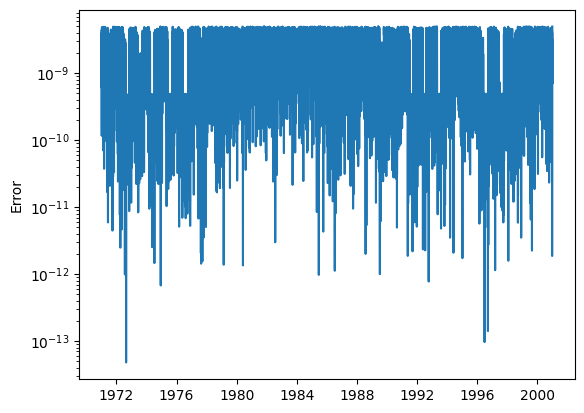

In [6]:
fig, ax = plt.subplots()
ax.plot(defaults.excel_results["date"], jnp.abs(defaults.excel_results["qsim"].to_numpy()-pred_excel))
ax.set_yscale("log")
ax.set_ylabel("Error")
pass

## Comparison between Excel and NAM+

In [8]:
final_state, pred_plus = nam_plus.predict(defaults.default_params, defaults.default_state, defaults.default_observations)

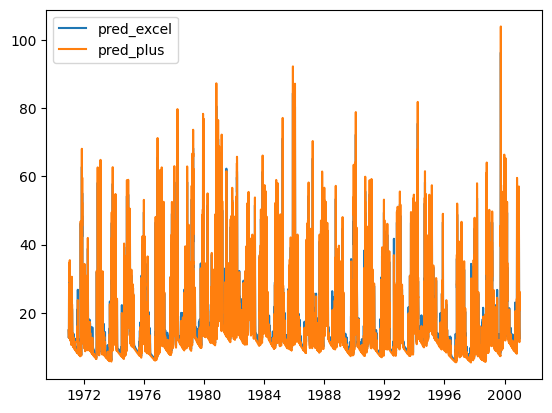

In [7]:
fig, ax = plt.subplots()
ax.plot(defaults.excel_results["date"], pred_excel, label="pred_excel")
ax.plot(defaults.excel_results["date"], pred_plus, label="pred_plus")
ax.legend()